# <center> Relazione 3 </center>

**NB:** in questa esercitazione è utilizzata la libreria random.h, necessaria per generare uniformemente numeri casuali. Tale libreria si trova nella cartella RANDOM_GEN: per compilare è prima necessario utilizzare il comando 'source setup.sh'. Il file setup.sh si trova nella cartella LSN_Delivery

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Le opzioni sono dei contratti in cui un solo partner assume l'obbligo, mentre l'altro ottiene un diritto. Un tipo comune di opzione è l' "European option". Tale opzione è un contratto fra due parti in cui si ha un venditore dell'opzione **(writer)** ed un compratore della stessa **(holder)**. Il writer garantisce all'holder il diritto di comprare da lui **(Call)** oppure vendergli **(Put)** un "under-lying asset" ad un certo prezzo $K$ alla data $T$ di scadenza del contratto. L'holder può esercitare il proprio diritto oppure no: chiaramente esso si presenterà il giorno $T$ solo nel momento in cui ci guadagna. Il writer tuttavia non stipula un contratto di questo genere senza chiedere una compensazione pecuniaria. Si tratta ora di capire quale sia il prezzo dell'opzione.

Se $S(t)$ è il valore al variare del tempo dell'asset considerato, si ha che il profitto dell'holder al tempo $T$ è pari a:
- $max\left[0, S(T)\,-\,K\right]$ per una Call-option

- $max\left[0, K\,-\,S(T)\right]$ per una Put-option

Per ottenere il valore presente del profitto è necessario riscalare il valore riportato in precedenza di un fattore $exp(-rT)$ dovuto al rate di interesse garantito. Il calcolo del prezzo dell'opzione corrisponde al seguente valore di aspettazione:
$$\langle exp(-rT)\cdot profitto(T)\rangle$$

#### Teoria di Black - Scholes

La teoria di Black - Scholes permette di ricavare delle soluzioni analitiche per il prezzo dell'opzione sia in situazione di Call che di Put. Tale teoria funziona sotto alcune assunzioni, ossia che l'evoluzione temporale del prezzo sia stocastica e presenti un moto browniano geometrico (GBM) caratterizzato da un interesse costante "risk-free" $r$ e da una volatilità $\sigma$.

Le soluzioni analitiche ottenute sono le seguenti:
- prezzo Call-option europeo:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- prezzo Put-option europeo:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

Si ha inoltre che:
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In seguito vengono calcolati i valori veri secondo la teoria di Black - Scholes nel caso da noi preso in considerazione, ossia quello caratterizzato da:
- prezzo asset a $t=0$: $S(0)=100$
- data di scadenza: $T=1$
- strike price: $K=100$
- interest rate: $r=0.1$
- volatilità: $\sigma=0.25$


In [8]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Il campionamento di $S(t)$, necessario per il calcolo del prezzo dell'opzione sia in caso di Put che in caso di Call, può essere effettuato in due modi differenti:
- campionamento discreto

- campionamento diretto

<span style="color:blue">  

## Campionamento discreto

</span>

Il campionamento discreto consiste nel dividere l'intervallo $\left[0,T\right]$ in 100 intervalli. Questo ci consente di valutare quanto valgano: $S(0)$, $S(t_1)$, $S(t_2)$ ... fino a giungere ad $S(t_{100}\,=\,T)$, ossia il valore dell'asset al tempo di scadenza $T$. Le varie stime ai differenti istanti di tempo sono date da una formula ricorsiva:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
dove si ha che: $Z_i \sim \mathcal{N}(0,1)$. Lo studio nel caso discreto è stato effettuato considerando $N\,=\,100$ blocchi di lunghezza $l_{blocco}\,=\,1000$. Vengono in seguito riportati sia nel caso di Call-option che in quello di Put-option l'andamento della media progressiva all'aumentare del numero di blocchi considerati.

- Costo Call

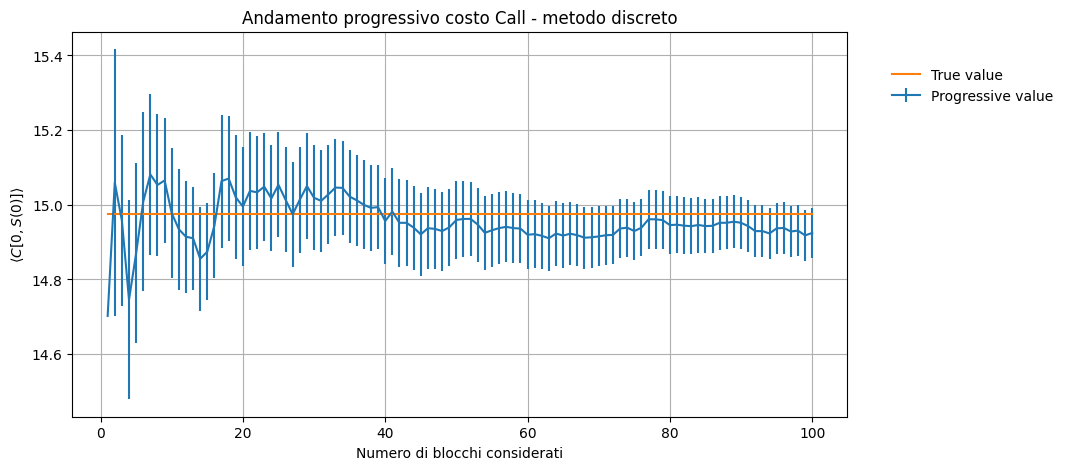

In [9]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/Osservabili/CallDiscreto.dat", unpack=True)
N = 100


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([call for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di blocchi considerati')
plt.ylabel(r"$\langle C\left[0,S(0)\right]\rangle$")

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento progressivo costo Call - metodo discreto")

plt.grid(True)
plt.show()

- Costo Put

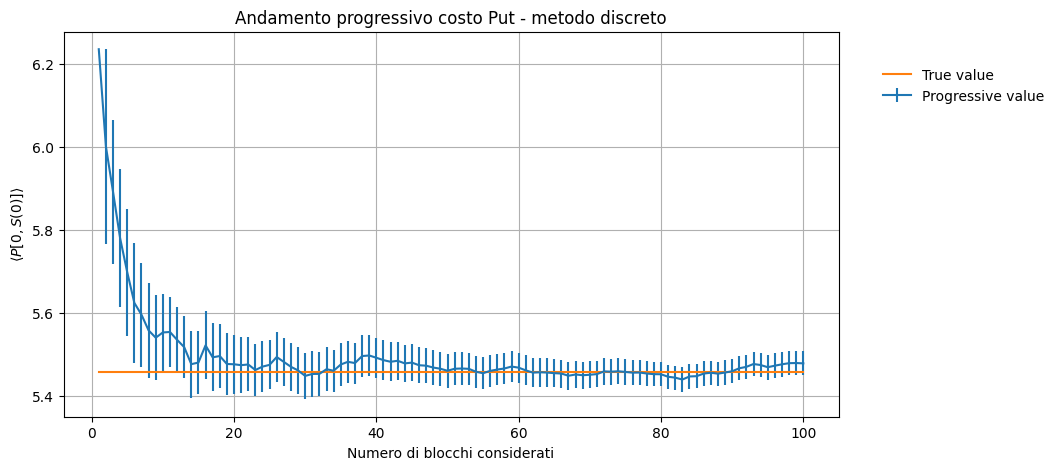

In [10]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/Osservabili/PutDiscreto.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([put for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di blocchi considerati')
plt.ylabel(r"$\langle P\left[0,S(0)\right]\rangle$")

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento progressivo costo Put - metodo discreto")

plt.grid(True)
plt.show()

<span style="color:blue">  

## Campionamento diretto

</span>

Il campionamento diretto consiste in una stima diretta del valore dell'asset al tempo di scadenza T. Si ha in particolare che:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
con $W(t)\sim\mathcal{N}(0,t)$.
Lo studio nel caso diretto è stato effettuato considerando $N\,=\,100$ blocchi di lunghezza $l_{blocco}\,=\,1000$. Vengono in seguito riportati sia nel caso di Call-option che in quello di Put-option l'andamento della media progressiva all'aumentare del numero di blocchi considerati.

- Costo Call

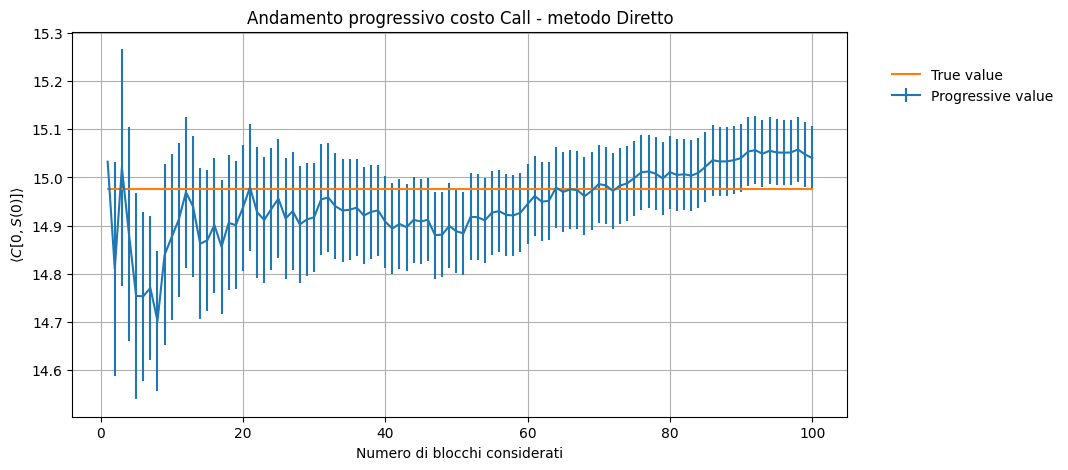

In [11]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/Osservabili/CallDiretto.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([call for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di blocchi considerati')
plt.ylabel(r"$\langle C\left[0, S(0)\right]\rangle$")

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento progressivo costo Call - metodo Diretto")

plt.grid(True)
plt.show()

- Costo Put

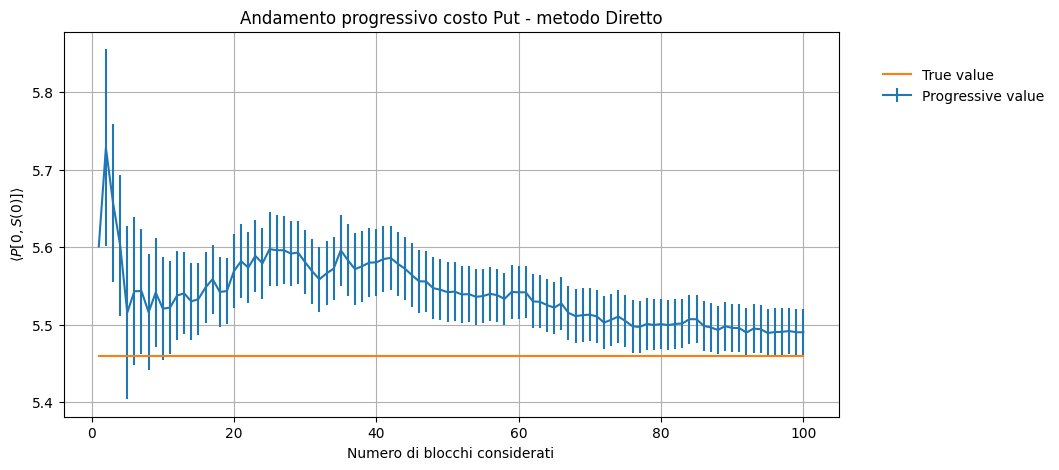

In [12]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/Osservabili/PutDiretto.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([put for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di blocchi considerati')
plt.ylabel(r"$\langle P\left[0, S(0)\right] \rangle$")

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento progressivo costo Put - metodo Diretto")

plt.grid(True)
plt.show()

Ciò che osserviamo è che i risultati ottenuti con il campionamento discreto sono maggiormente compatibili con i valori teoricamente predetti rispetto a quelli del campionamento diretto: tuttavia si ha elevata compatibilità fra risultati ottenuti mediante simulazione e i valori predetti dalla teoria di Black-Scholes